# Analysis of Budyko Data from VIC, Subsetted by Ecoregion

### Theodore Barnhart | Created: 20150306 | Updated: 20150309

Script to take the Budyko relevent data mined from Ben L.'s VIC simulations and plot it in Budyko space. 

### Foreword

This notebook goes through some analyses of the Ben's VIC simulation with the goal of elucidating a process control on the streamflow anomaly pattern shown by Berghuijs and others. 

***Generally, figures are followed by a explanative caption. You can ingnor the code.*** 

### Front Matter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats

In [2]:
data = pd.read_hdf('./budyko_working_er_sm2.hdf','df')

In [3]:
data.rc.unique()

array([ 5.,  2.,  4.,  1.,  3.])

In [ ]:
data.columns

In [5]:
len(data)

19983

In [6]:
# define a function for computing the EI from a given DI
def budyko(DI):
    return np.sqrt(DI*np.tanh(1/DI)*(1-np.exp(-DI)))

In [7]:
data['PETpenvic_P'] = data['PETpenmanvic']/data['P'] # compute the dryness index

In [8]:
data['ET_P'] = data['ET']/data['P'] # compute the evaporative index

## Plot the Budyko Curve

In [9]:
DI = np.arange(0,50.001,0.001) # make a range to compute the budyko curve over

In [10]:
EI = budyko(DI) # compute the Budyko Curve

## Compute Budyko anomaly

In [11]:
data['pred_EI'] = data['PETpenvic_P'].apply(budyko) # compute the predicted evaportative index for each cell given its aridity

In [12]:
data['Q_P'] = 1.-data['ET_P'] # compute actual runoff for each cell 

In [13]:
data['Qpred_P'] = 1.-data['pred_EI'] # compute predicted runoff for each cell

In [14]:
data['Qanom_P'] = data['Q_P']-data['Qpred_P'] # compute the anomoly (actual - predicted)

In [15]:
data['Q'] = data.Q_P*data.P # compute Q not normalized by P

In [16]:
data['Qanom'] = data.Qanom_P*data.P

In [17]:
stats.ttest_1samp(data['Qanom_P'],0) # test if the mean anomaly is different from zero.

Ttest_1sampResult(statistic=114.21528608869609, pvalue=0.0)

### Fit a model to the streamflow anaomaly

In [16]:
X = data.Sf # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model

Sfg = np.arange(0,1.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

In [17]:
X = data.P # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model

Sfg = np.arange(0,1.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values
print gr_value**2

0.112028250513


In [18]:
X = data.meanpeakswe # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model

Sfg = np.arange(0,1.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values
print gr_value**2

0.336911724769


In [19]:
X = data.snowmelt # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model

Sfg = np.arange(0,1.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values
print gr_value**2

0.320591067146


In [20]:
X = data.snowmelt # pull out the independant variable
y = data.meanpeakswe # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model

Sfg = np.arange(0,1.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values
print gr_value**2

0.877581631284


In [21]:
import statsmodels.api as sm

In [22]:
mod = sm.formula.ols('Qanom_P ~ snowmelt + 1',data).fit()
mod2 = sm.formula.ols('Qanom_P ~ snowmelt + meanpeakswe + 1',data).fit()
mod3 = sm.formula.ols('Qanom_P ~ meanpeakswe + 1',data).fit()
mod4 = sm.formula.ols('Qanom_P ~ 1',data).fit()

In [23]:
(mod1.ssr - mod2.ssr)/mod1.ssr

NameError: name 'mod1' is not defined

In [ ]:
(mod3.ssr - mod2.ssr)/mod3.ssr

In [ ]:
(mod4.ssr - mod1.ssr)/mod4.ssr

In [ ]:
(mod4.ssr - mod3.ssr)/mod4.ssr

In [ ]:
sm.stats.anova_lm(mod2)

In [ ]:
X

In [ ]:
mod.summary2()

### Make a colormap

## Plot it up

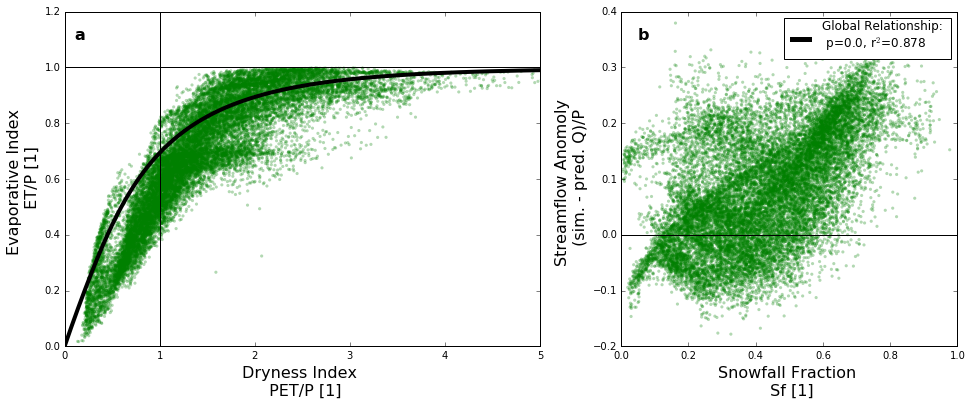

In [24]:
bgcolor = '0.35'

fig = plt.figure(figsize=(16, 6))
ax = plt.subplot2grid((1,13),(0,0), colspan = 7)
ax.scatter(data.PETpenvic_P,data.ET_P,s = 10,c='g', alpha=0.3, edgecolor='none')
ax.plot(DI,EI,'-k', lw=4)
ax.set_ylabel('Evaporative Index \n ET/P [1]',fontsize=16)
ax.set_xlabel('Dryness Index \n PET/P [1]', fontsize=16)
ax.axhline(1,c='k')
ax.axvline(1,c='k')
#ax.set_ylim(-0.2,1.2);
ax.set_xlim(0,5);
ax.set_ylim(0,1.2);
#ax.set_axis_bgcolor(bgcolor)
#ax.axis('equal')
#ax.legend(['VIC Data','Budyko, 1974'], loc = 'lower right');
ax.annotate('a',[0.1,1.1], fontsize = 16, fontweight = 'bold');

ax2 = plt.subplot2grid((1,13),(0,8), colspan = 7)
#ax2.set_color_cycle(Set3_11.mpl_colors)
p1 = ax2.scatter(data.Sf,data.Qanom_P,s = 10, c = 'g', alpha = 0.3, edgecolor = 'none');
p2 = ax2.plot(Sfg,modg,'-k', lw = 5)
ax2.set_xlabel('Snowfall Fraction \n Sf [1]', fontsize = 16);
ax2.set_ylabel('Streamflow Anomoly \n (sim. - pred. Q)/P', fontsize=16)
ax2.annotate('b',[0.05,0.35], fontsize = 16, fontweight = 'bold');
ax2.axhline(0,c='k',lw=1)
ax2.set_xlim(0,1)
ax2.set_ylim(-.2,0.4)
#cb.set_label('Ecoregion')

leg = ax2.legend(p2,['Global Relationship: \n p='+str(round(gp_value,3))+', r$^2$='+str(round(gr_value**2,3))])
frame = leg.get_frame()
frame.set_edgecolor('k')
text = leg.get_texts()
text[0].set_color('k')
    
#for ax, color in zip([ax, ax2], ['w', 'w']):
#    plt.setp(ax.spines.values(), color=color)
#    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color=color)

#plt.savefig('./figures/fig1_reproduction_er_small.jpg')

#print 'r2 =',round(r_value**2,3)
#print 'p =',round(p_value,3)
#print 'slope =',round(slope,3)

***Figure 1 from Berghuijs et al.*** There is clear structure in A which cooresponds to different ecoregions. B shows the same relationship between Qanom and Sf as in Berghuijs et al.

## Plot different SF - Qanom relationships based on ecoregion

## Create a 4 panel plot of Sf vs Snowmelt and Qanom vs Snowmelt

0.0
0.0
0.0


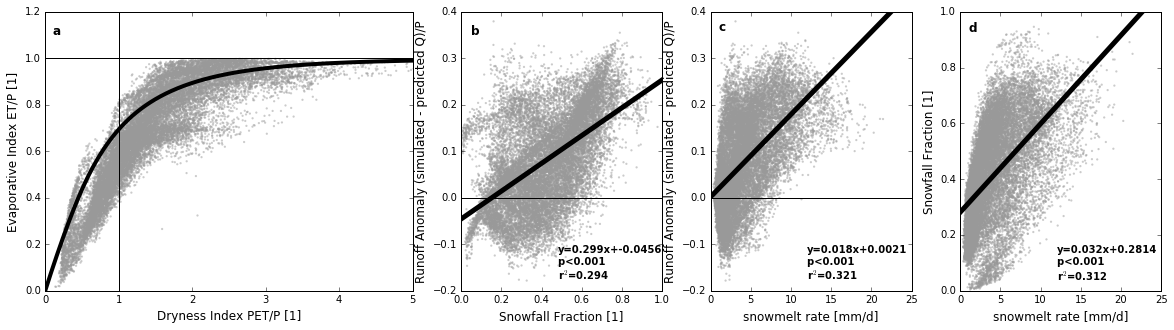

In [25]:
SF = 'Sf'
c='0.6'
rowcol = (1,27)
figsize = (20,5)
s = 5
alpha = 0.5

fontsize = 12

fig = plt.figure(figsize=figsize)

ax1 = plt.subplot2grid(rowcol,(0,0), colspan = 9)
ax2 = plt.subplot2grid(rowcol,(0,10), colspan = 5)
ax4 = plt.subplot2grid(rowcol,(0,16), colspan = 5)
ax3 = plt.subplot2grid(rowcol,(0,22), colspan = 5)

# Budyko Curve and Sf Qanom 

X = data[SF] # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
print gp_value
Sfg = np.arange(0,1.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

ax1.scatter(data.PETpenvic_P,data.ET_P,s = s,c=c, alpha=alpha, edgecolor='none')
ax1.plot(DI,EI,'-k', lw=4)
ax1.set_ylabel('Evaporative Index ET/P [1]',fontsize=fontsize)
ax1.set_xlabel('Dryness Index PET/P [1]', fontsize=fontsize)
ax1.axhline(1,c='k')
ax1.axvline(1,c='k')
ax1.set_xlim(0,5);
ax1.set_ylim(0,1.2);
ax1.annotate('a',[0.1,1.1], fontsize = fontsize, fontweight = 'bold', color='k');

p1 = ax2.scatter(data[SF],data.Qanom_P,s = s, c = c, alpha = alpha, edgecolor = 'none');
ct = 0
p2 = ax2.plot(Sfg,modg,'-k', lw = 5)
ax2.set_xlabel('Snowfall Fraction [1]', fontsize = fontsize);
ax2.set_ylabel('Runoff Anomaly (simulated - predicted Q)/P', fontsize=fontsize)
ax2.annotate('b',[0.05,0.35], fontsize = fontsize, fontweight = 'bold',color='k');
ax2.axhline(0,c='k',lw=1)
ax2.set_xlim(0,1)
ax2.set_ylim(-.2,0.4)
eq = 'y='+str(round(slope,3))+'x+'+str(round(intercept,4))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,3))
ax2.text(0.48,-0.175,eq,fontweight='bold')


##########################

# Sf vs Snowmelt

X = data.snowmelt # pull out the independant variable
y = data[SF] # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
print gp_value
Sfg = np.arange(0,35.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

p2 = ax3.scatter(data.snowmelt,data[SF],s = s, c = c, alpha = alpha, edgecolor = 'none');

p2 = ax3.plot(Sfg,modg,'-k', lw = 5)
ax3.set_xlabel('snowmelt rate [mm/d]', fontsize = fontsize);
ax3.set_ylabel('Snowfall Fraction [1]', fontsize=fontsize)
ax3.annotate('d',[1,0.93], fontsize = fontsize, fontweight = 'bold',color='k');
ax3.axhline(0,c='k',lw=1)
ax3.set_xlim(0,25)
ax3.set_ylim(0,1)
eq = 'y='+str(round(slope,3))+'x+'+str(round(intercept,4))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,3))
ax3.text(12,0.04,eq,fontweight='bold')
    
## now Qanom vs Snowmelt

X = data.snowmelt # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
print gp_value

Sfg = np.arange(0,35.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

p4 = ax4.scatter(data.snowmelt,data.Qanom_P,s = s, c = c, alpha = alpha, edgecolor = 'none');
p4 = ax4.plot(Sfg,modg,'-k', lw = 5)
ax4.set_xlabel('snowmelt rate [mm/d]', fontsize = fontsize);
ax4.set_ylabel('Runoff Anomaly (simulated - predicted Q)/P', fontsize=fontsize)
ax4.annotate('c',[1,0.36], fontsize = fontsize, fontweight = 'bold',color='k');
ax4.axhline(0,c='k',lw=1)
ax4.set_xlim(0,25)
ax4.set_ylim(-.2,.4)
eq = 'y='+str(round(slope,3))+'x+'+str(round(intercept,4))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,3))
ax4.text(12,-0.175,eq,fontweight='bold');

#ax4.legend(p4,['p='+str(round(gp_value,3))+', r$^2$='+str(round(gr_value**2,3))],loc='best')

    
#plt.savefig('./figures/comment_4_pannel.png', bbox_inches='tight')
#plt.savefig('./figures/comment_4_pannel.pdf', bbox_inches='tight')

0.0


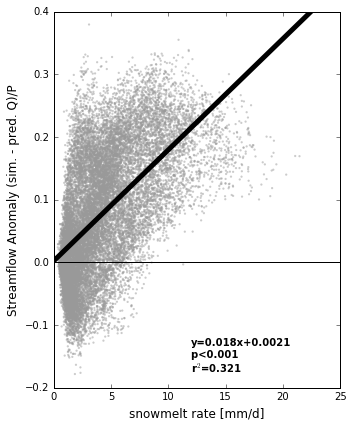

In [26]:
fig = plt.figure(figsize=(5,6))
ax4 = fig.add_subplot(111)
## now Qanom vs Snowmelt

X = data.snowmelt # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
print gp_value

Sfg = np.arange(0,35.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

p4 = ax4.scatter(data.snowmelt,data.Qanom_P,s = s, c = c, alpha = alpha, edgecolor = 'none');
p4 = ax4.plot(Sfg,modg,'-k', lw = 5)
ax4.set_xlabel('snowmelt rate [mm/d]', fontsize = fontsize);
ax4.set_ylabel('Streamflow Anomaly (sim. - pred. Q)/P', fontsize=fontsize)
#ax4.annotate('c',[1,0.36], fontsize = fontsize, fontweight = 'bold',color='k');
ax4.axhline(0,c='k',lw=1)
ax4.set_xlim(0,25)
ax4.set_ylim(-.2,.4)
eq = 'y='+str(round(slope,3))+'x+'+str(round(intercept,4))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,3))
ax4.text(12,-0.175,eq,fontweight='bold')
fig.tight_layout();
plt.savefig('./figures/snowmelt_qanom_agu15.png', dpi=300, bbox_inches='tight')

0.0


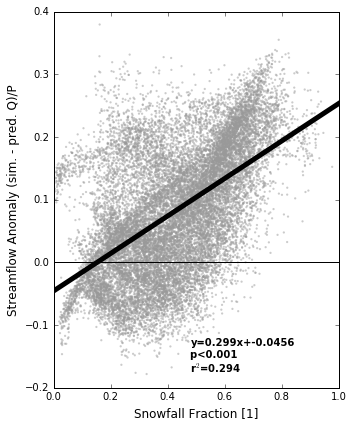

In [27]:
fig = plt.figure(figsize=(5,6))
ax2 = fig.add_subplot(111)
# Budyko Curve and Sf Qanom 

X = data[SF] # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
print gp_value
Sfg = np.arange(0,1.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

p1 = ax2.scatter(data[SF],data.Qanom_P,s = s, c = c, alpha = alpha, edgecolor = 'none');
ct = 0
p2 = ax2.plot(Sfg,modg,'-k', lw = 5)
ax2.set_xlabel('Snowfall Fraction [1]', fontsize = fontsize);
ax2.set_ylabel('Streamflow Anomaly (sim. - pred. Q)/P', fontsize=fontsize)
#ax2.annotate('b',[0.05,0.35], fontsize = fontsize, fontweight = 'bold',color='k');
ax2.axhline(0,c='k',lw=1)
ax2.set_xlim(0,1)
ax2.set_ylim(-.2,0.4)
eq = 'y='+str(round(slope,3))+'x+'+str(round(intercept,4))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,3))
ax2.text(0.48,-0.175,eq,fontweight='bold')

fig.tight_layout();
plt.savefig('./figures/sf_qanom_agu15.png', dpi=300, bbox_inches='tight')

0.449865249988
0.0


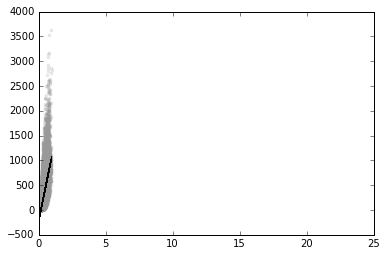

In [28]:
X = data.Sf # pull out the independant variable
y = data.meanpeakswe # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
plt.plot(X,y,'.',color='0.6',alpha=0.2)
plt.plot(X,X*slope+intercept,'-k')
plt.xlim(0,25)
print gr_value**2
print gp_value

In [29]:
data.columns

Index([u'frlon', u'PETpenmanvic', u'P', u'ET', u'frlat', u'Sf',
       u'meanablseason', u'meandosnowfree', u'meanpeakswe', u'meanpeaket',
       ...
       u'idx2', u'rc', u'PETpenvic_P', u'ET_P', u'pred_EI', u'Q_P', u'Qpred_P',
       u'Qanom_P', u'Q', u'Qanom'],
      dtype='object', length=109)

In [30]:
data['SAcolor']=np.NaN

In [31]:
data.loc[data.Qanom_P<0,'SAcolor']='#d7191c'
data.loc[data.Qanom_P>0,'SAcolor']='#2b83ba'

0.0
0.0
0.0


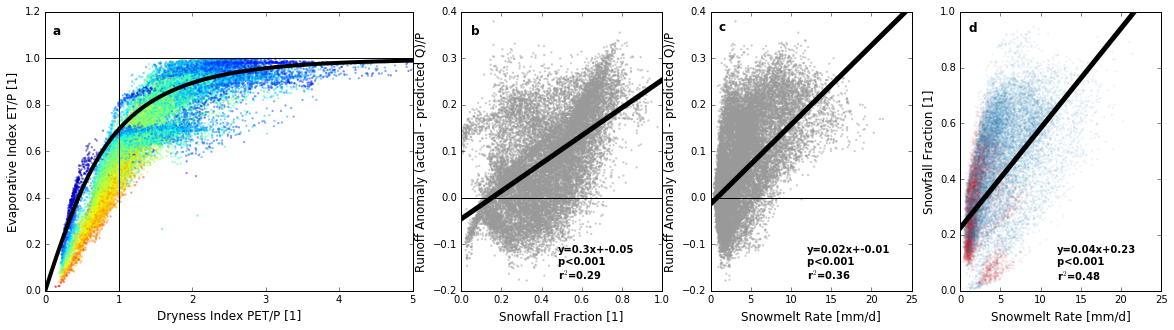

In [32]:
SF = 'Sf'
c='0.6'
rowcol = (1,27)
figsize = (20,5)
s = 5
alpha = 0.5

fontsize = 12

fig = plt.figure(figsize=figsize)

ax1 = plt.subplot2grid(rowcol,(0,0), colspan = 9)
ax2 = plt.subplot2grid(rowcol,(0,10), colspan = 5)
ax4 = plt.subplot2grid(rowcol,(0,16), colspan = 5)
ax3 = plt.subplot2grid(rowcol,(0,22), colspan = 5)

# Budyko Curve and Sf Qanom 

X = data[SF] # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
print gp_value
Sfg = np.arange(0,1.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

ax1.scatter(data.PETpenvic_P,data.ET_P,s = s,c=data.Sf, alpha=alpha, edgecolor='none')
ax1.plot(DI,EI,'-k', lw=4)
ax1.set_ylabel('Evaporative Index ET/P [1]',fontsize=fontsize)
ax1.set_xlabel('Dryness Index PET/P [1]', fontsize=fontsize)
ax1.axhline(1,c='k')
ax1.axvline(1,c='k')
ax1.set_xlim(0,5);
ax1.set_ylim(0,1.2);
ax1.annotate('a',[0.1,1.1], fontsize = fontsize, fontweight = 'bold', color='k');

p1 = ax2.scatter(data[SF],data.Qanom_P,s = s, c = c, alpha = alpha, edgecolor = 'none');
ct = 0
p2 = ax2.plot(Sfg,modg,'-k', lw = 5)
ax2.set_xlabel('Snowfall Fraction [1]', fontsize = fontsize);
ax2.set_ylabel('Runoff Anomaly (actual - predicted Q)/P', fontsize=fontsize)
ax2.annotate('b',[0.05,0.35], fontsize = fontsize, fontweight = 'bold',color='k');
ax2.axhline(0,c='k',lw=1)
ax2.set_xlim(0,1)
ax2.set_ylim(-.2,0.4)
eq = 'y='+str(round(slope,2))+'x+'+str(round(intercept,2))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,2))
ax2.text(0.48,-0.175,eq,fontweight='bold')


##########################

# Sf vs Snowmelt

X = data.netSM # pull out the independant variable
y = data[SF] # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
print gp_value
Sfg = np.arange(0,35.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

p2 = ax3.scatter(data.snowmelt,data[SF],s = s, c = data.SAcolor, alpha = 0.09, edgecolor = 'none');

p2 = ax3.plot(Sfg,modg,'-k', lw = 5)
ax3.set_xlabel('Snowmelt Rate [mm/d]', fontsize = fontsize);
ax3.set_ylabel('Snowfall Fraction [1]', fontsize=fontsize)
ax3.annotate('d',[1,0.93], fontsize = fontsize, fontweight = 'bold',color='k');
ax3.axhline(0,c='k',lw=1)
ax3.set_xlim(0,25)
ax3.set_ylim(0,1)
eq = 'y='+str(round(slope,2))+'x+'+str(round(intercept,2))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,2))
ax3.text(12,0.04,eq,fontweight='bold')
    
## now Qanom vs Snowmelt

X = data.netSM # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
print gp_value

Sfg = np.arange(0,35.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

p4 = ax4.scatter(data.snowmelt,data.Qanom_P,s = s, c = c, alpha = alpha, edgecolor = 'none');
p4 = ax4.plot(Sfg,modg,'-k', lw = 5)
ax4.set_xlabel('Snowmelt Rate [mm/d]', fontsize = fontsize);
ax4.set_ylabel('Runoff Anomaly (actual - predicted Q)/P', fontsize=fontsize)
ax4.annotate('c',[1,0.36], fontsize = fontsize, fontweight = 'bold',color='k');
ax4.axhline(0,c='k',lw=1)
ax4.set_xlim(0,25)
ax4.set_ylim(-.2,.4)
eq = 'y='+str(round(slope,2))+'x+'+str(round(intercept,2))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,2))
ax4.text(12,-0.175,eq,fontweight='bold');

#ax4.legend(p4,['p='+str(round(gp_value,3))+', r$^2$='+str(round(gr_value**2,3))],loc='best')

    
#plt.savefig('./figures/comment_4_pannel_netSM.png', bbox_inches='tight', dpq=300)
#plt.savefig('./figures/comment_4_pannel_netSM_hr.png', bbox_inches='tight',dpi=1200)
#plt.savefig('./figures/comment_4_pannel_netSM.pdf', bbox_inches='tight')

## Look at what might be driving the ralationship

In [33]:
import statsmodels.formula.api as sm

In [34]:
data['bf_p'] = data.bf/data.P

                            OLS Regression Results                            
Dep. Variable:                     bf   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 3.855e+04
Date:                Sat, 06 Feb 2016   Prob (F-statistic):               0.00
Time:                        11:28:15   Log-Likelihood:                -13857.
No. Observations:               19983   AIC:                         2.772e+04
Df Residuals:                   19981   BIC:                         2.773e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2701      0.006    -46.073      0.0

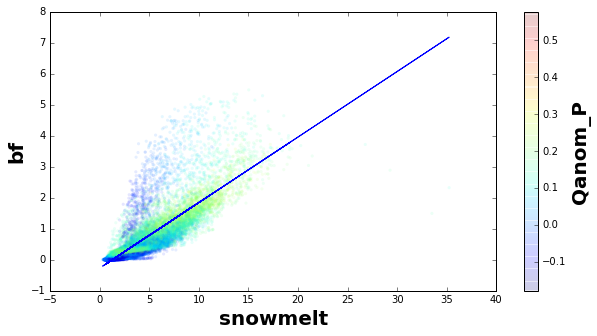

In [35]:
xx = 'snowmelt'
yy = 'bf'
cc = 'Qanom_P'

mod = sm.ols(yy+' ~ '+xx+' + 1',data).fit()
print mod.summary()

plt.figure(figsize=(10,5))
plt.scatter(data[xx],data[yy],s = 10, c = data[cc], edgecolor = 'none', alpha = 0.1)
c = plt.colorbar()
c.set_label(cc,fontsize=20, weight='bold')
plt.xlabel(xx, fontsize=20, weight='bold')
plt.ylabel(yy, fontsize=20, weight='bold')

plt.plot(mod.model.data.exog[:,1],mod.fittedvalues,'-b')

In [36]:
data['ln_sm'] = np.log(data.snowmelt)

In [37]:
data['sm_p'] = data.snowmelt/data.P
data['ln_sm_p'] = np.log(data.sm_p)

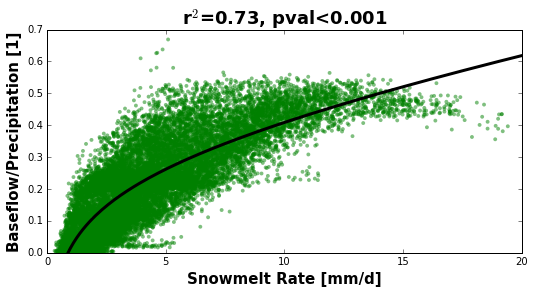

In [38]:
xx = 'snowmelt'
yy = 'bf_p'
cc = 'Qanom_P'

mod = sm.ols(yy+' ~ '+xx+' + ln_sm + 1',data).fit()
#print mod.summary()

plt.figure(figsize=(8.5,4))
plt.scatter(data[xx],data[yy],s=15,alpha = 0.5,c='g', edgecolor='none')
#c = plt.colorbar()
#c.set_label('Runoff Anomaly',fontsize=15, weight='bold')
plt.xlabel('Snowmelt Rate [mm/d]', fontsize=15, weight='bold')
plt.ylabel('Baseflow/Precipitation [1]', fontsize=15, weight='bold')
#c.alpha=1
#c.draw_all()

title = 'r$^2$=%s, pval<0.001'%(round(mod.rsquared,2))

plt.xlim(0,20)
plt.ylim(0,0.7)

xnew = np.linspace(0.31269355539464155,40,300)
ynew = 0.005 + xnew*0.0126 + np.log(xnew)*0.1206

plt.plot(xnew,ynew,'-k', lw = 3)
#plt.plot(mod.model.data.exog[:,1],mod.fittedvalues,'.b')
plt.title(title, fontsize = 18, weight = 'bold')
plt.savefig('./figures/sm_bf_p_Qanom_P.png',dpi=300,bbox_inches='tight')

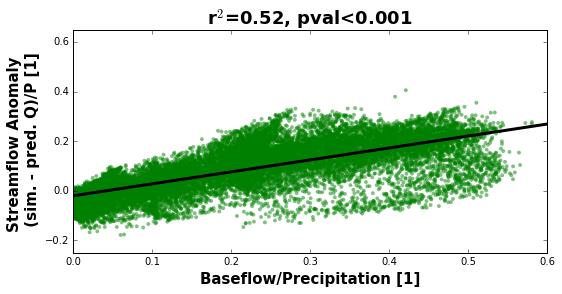

In [39]:
xx = 'bf_p'
yy = 'Qanom_P'
cc = 'g'

mod = sm.ols(yy+' ~ '+xx+' + 1',data).fit()
#print mod.summary()

plt.figure(figsize=(8.5,4))
#plt.hexbin(data[xx],data[yy],cmap='cool',mincnt=1,gridsize=50,bins='log')
plt.scatter(data[xx],data[yy],s = 15, c = cc, edgecolor = 'none', alpha = 0.5)
#c = plt.colorbar()
#c.set_label('Snowmelt Rate [mm/d]',fontsize=15, weight='bold')
plt.xlabel('Baseflow/Precipitation [1]', fontsize=15, weight='bold')
plt.ylabel('Streamflow Anomaly \n (sim. - pred. Q)/P [1]', fontsize=15, weight='bold')
c.alpha=1
c.draw_all()

title = 'r$^2$=%s, pval<0.001'%(round(mod.rsquared,2))

plt.xlim(0,0.6)
plt.ylim(-0.25,0.65)

xnew = np.linspace(-0.1,0.8,300)
ynew = -0.0202 + xnew*0.4824

plt.plot(xnew,ynew,'-k', lw = 3)
#plt.plot(mod.model.data.exog[:,1],mod.fittedvalues,'.b')
plt.title(title, fontsize = 18, weight = 'bold')
plt.savefig('./figures/bf_p_Qanom_P.png',dpi=300,bbox_inches='tight')

In [40]:
data.snowmelt.describe()

count    19983.000000
mean         4.418562
std          3.179835
min          0.312694
25%          1.936758
50%          3.568344
75%          6.029401
max         35.238598
Name: snowmelt, dtype: float64

In [41]:
np.percentile(data.snowmelt,95)

10.707512678612671

0.0
0.0


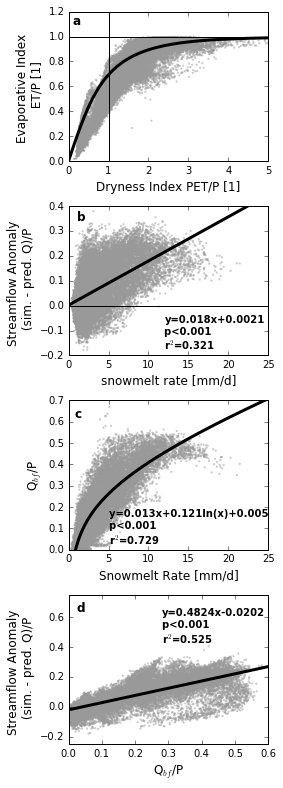

In [42]:
SF = 'Sf'
c='0.6'
rowcol = (1,27)
figsize = (4,11)
s = 5
alpha = 0.5

fontsize = 12

fig = plt.figure(figsize=figsize)

ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

# Budyko Curve and Sf Qanom 

X = data[SF] # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
print gp_value
Sfg = np.arange(0,1.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

ax1.scatter(data.PETpenvic_P,data.ET_P,s = s,c=c, alpha=alpha, edgecolor='none')
ax1.plot(DI,EI,'-k', lw=3)
ax1.set_ylabel('Evaporative Index \n ET/P [1]',fontsize=fontsize)
ax1.set_xlabel('Dryness Index PET/P [1]', fontsize=fontsize)
ax1.axhline(1,c='k')
ax1.axvline(1,c='k')
ax1.set_xlim(0,5);
ax1.set_ylim(0,1.2);
ax1.annotate('a',[0.1,1.1], fontsize = fontsize, fontweight = 'bold', color='k');

## now Qanom vs Snowmelt

X = data.snowmelt # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
print gp_value

Sfg = np.arange(0,35.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

p1 = ax2.scatter(data.snowmelt,data.Qanom_P,s = s, c = c, alpha = alpha, edgecolor = 'none');
p1 = ax2.plot(Sfg,modg,'-k', lw = 3)
ax2.set_xlabel('snowmelt rate [mm/d]', fontsize = fontsize);
ax2.set_ylabel('Streamflow Anomaly \n (sim. - pred. Q)/P', fontsize=fontsize)
ax2.annotate('b',[1,0.34], fontsize = fontsize, fontweight = 'bold',color='k');
ax2.axhline(0,c='k',lw=1)
ax2.set_xlim(0,25)
ax2.set_ylim(-.2,.4)
eq = 'y='+str(round(slope,3))+'x+'+str(round(intercept,4))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,3))
ax2.text(12,-0.175,eq,fontweight='bold');

## Snowmelt rate vs baseflow

xx = 'snowmelt'
yy = 'bf_p'

mod = sm.ols(yy+' ~ '+xx+' + ln_sm + 1',data).fit()
p2 = ax3.scatter(data[xx],data[yy],s = s, c = c, edgecolor = 'none', alpha = alpha)
ax3.set_xlabel('Snowmelt Rate [mm/d]', fontsize=fontsize)
ax3.set_ylabel('Q$_{bf}$/P', fontsize=fontsize)
ax3.annotate('c',[0.8,0.62], fontsize = fontsize, fontweight = 'bold',color='k');
eq = 'y=0.013x+0.121ln(x)+0.005 \np<0.001 \nr$^2$='+str(round(mod.rsquared,3))
ax3.text(5,0.03,eq,fontweight='bold');
ax3.set_xlim(0,25)
ax3.set_ylim(0,0.7)
xnew = np.linspace(0.31269355539464155,40,300)
ynew = 0.005 + xnew*0.0126 + np.log(xnew)*0.1206
ax3.plot(xnew,ynew,'-k', lw = 3)

## Baseflow vs Runoff anomaly

xx = 'bf_p'
yy = 'Qanom_P'

mod = sm.ols(yy+' ~ '+xx+' + 1',data).fit()
p3 = ax4.scatter(data[xx],data[yy],s = s, c = c, edgecolor = 'none', alpha = alpha)
ax4.set_xlabel('Q$_{bf}$/P', fontsize=fontsize)
ax4.set_ylabel('Streamflow Anomaly \n (sim. - pred. Q)/P', fontsize=fontsize)
eq = 'y=0.4824x-0.0202\np<0.001 \nr$^2$='+str(round(mod.rsquared,3))
ax4.text(0.28,0.43,eq,fontweight='bold');
ax4.set_xlim(0,0.6)
ax4.set_ylim(-0.25,0.75)
ax4.annotate('d',[0.025,0.64], fontsize = fontsize, fontweight = 'bold',color='k');
xnew = np.linspace(-0.1,0.8,300)
ynew = -0.0202 + xnew*0.4824
ax4.plot(xnew,ynew,'-k', lw = 3);
fig.tight_layout();
    
#plt.savefig('./figures/GRL_4_pannel_vert.png', bbox_inches='tight')
plt.savefig('./figures/comment_4_pannel.pdf', bbox_inches='tight')

0.0


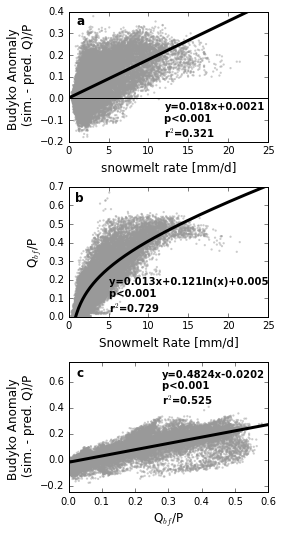

In [44]:
SF = 'Sf'
c='0.6'
rowcol = (1,27)
figsize = (4,7.5)
s = 5
alpha = 0.5

fontsize = 12

fig = plt.figure(figsize=figsize)


ax2 = fig.add_subplot(311)
ax3 = fig.add_subplot(312)
ax4 = fig.add_subplot(313)

## now Qanom vs Snowmelt

X = data.snowmelt # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
print gp_value

Sfg = np.arange(0,35.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

p1 = ax2.scatter(data.snowmelt,data.Qanom_P,s = s, c = c, alpha = alpha, edgecolor = 'none');
p1 = ax2.plot(Sfg,modg,'-k', lw = 3)
ax2.set_xlabel('snowmelt rate [mm/d]', fontsize = fontsize);
ax2.set_ylabel('Budyko Anomaly \n (sim. - pred. Q)/P', fontsize=fontsize)
ax2.annotate('a',[1,0.34], fontsize = fontsize, fontweight = 'bold',color='k');
ax2.axhline(0,c='k',lw=1)
ax2.set_xlim(0,25)
ax2.set_ylim(-.2,.4)
eq = 'y='+str(round(slope,3))+'x+'+str(round(intercept,4))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,3))
ax2.text(12,-0.175,eq,fontweight='bold');

## Snowmelt rate vs baseflow

xx = 'snowmelt'
yy = 'bf_p'

mod = sm.ols(yy+' ~ '+xx+' + ln_sm + 1',data).fit()
p2 = ax3.scatter(data[xx],data[yy],s = s, c = c, edgecolor = 'none', alpha = alpha)
ax3.set_xlabel('Snowmelt Rate [mm/d]', fontsize=fontsize)
ax3.set_ylabel('Q$_{bf}$/P', fontsize=fontsize)
ax3.annotate('b',[0.8,0.62], fontsize = fontsize, fontweight = 'bold',color='k');
eq = 'y=0.013x+0.121ln(x)+0.005 \np<0.001 \nr$^2$='+str(round(mod.rsquared,3))
ax3.text(5,0.03,eq,fontweight='bold');
ax3.set_xlim(0,25)
ax3.set_ylim(0,0.7)
xnew = np.linspace(0.31269355539464155,40,300)
ynew = 0.005 + xnew*0.0126 + np.log(xnew)*0.1206
ax3.plot(xnew,ynew,'-k', lw = 3)

## Baseflow vs Runoff anomaly

xx = 'bf_p'
yy = 'Qanom_P'

mod = sm.ols(yy+' ~ '+xx+' + 1',data).fit()
p3 = ax4.scatter(data[xx],data[yy],s = s, c = c, edgecolor = 'none', alpha = alpha)
ax4.set_xlabel('Q$_{bf}$/P', fontsize=fontsize)
ax4.set_ylabel('Budyko Anomaly \n (sim. - pred. Q)/P', fontsize=fontsize)
eq = 'y=0.4824x-0.0202\np<0.001 \nr$^2$='+str(round(mod.rsquared,3))
ax4.text(0.28,0.43,eq,fontweight='bold');
ax4.set_xlim(0,0.6)
ax4.set_ylim(-0.25,0.75)
ax4.annotate('c',[0.025,0.64], fontsize = fontsize, fontweight = 'bold',color='k');
xnew = np.linspace(-0.1,0.8,300)
ynew = -0.0202 + xnew*0.4824
ax4.plot(xnew,ynew,'-k', lw = 3);
fig.tight_layout();
    
plt.savefig('./figures/NESSF16_3_pannel_vert.png', bbox_inches='tight')
#plt.savefig('./figures/comment_4_pannel.pdf', bbox_inches='tight')

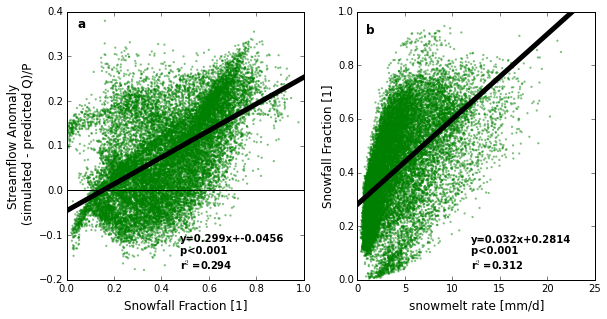

In [51]:
fig = plt.figure(figsize=(8.5,4.5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
c = 'g'

X = data[SF] # pull out the independant variable
y = data.Qanom_P # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model
Sfg = np.arange(0,1.001,.001) # generate a smooth snow fraction domain
modg = Sfg*slope+intercept # generate predicted values

p1 = ax1.scatter(data[SF],data.Qanom_P,s = s, c = c, alpha = alpha, edgecolor = 'none');
p2 = ax1.plot(Sfg,modg,'-k', lw = 5)
ax1.set_xlabel('Snowfall Fraction [1]', fontsize = fontsize);
ax1.set_ylabel('Streamflow Anomaly\n (simulated - predicted Q)/P', fontsize=fontsize)
ax1.annotate('a',[0.05,0.365], fontsize = fontsize, fontweight = 'bold',color='k');
ax1.axhline(0,c='k',lw=1)
ax1.set_xlim(0,1)
ax1.set_ylim(-.2,0.4)
eq = 'y='+str(round(slope,3))+'x+'+str(round(intercept,4))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,3))
ax1.text(0.48,-0.175,eq,fontweight='bold')


##########################

# Sf vs Snowmelt

X = data.snowmelt # pull out the independant variable
y = data[SF] # pull out the dependant variable

slope, intercept, gr_value, gp_value, std_err = stats.linregress(X,y) # fit the model

Sfg = np.arange(0,35.001,.001) # generate a smooth snow fraction domain

modg = Sfg*slope+intercept # generate predicted values

p3 = ax2.scatter(data.snowmelt,data[SF],s = s, c = c, alpha = alpha, edgecolor = 'none');

p4 = ax2.plot(Sfg,modg,'-k', lw = 5)
ax2.set_xlabel('snowmelt rate [mm/d]', fontsize = fontsize);
ax2.set_ylabel('Snowfall Fraction [1]', fontsize=fontsize)
ax2.annotate('b',[1,0.92], fontsize = fontsize, fontweight = 'bold',color='k');
ax2.axhline(0,c='k',lw=1)
ax2.set_xlim(0,25)
ax2.set_ylim(0,1)
eq = 'y='+str(round(slope,3))+'x+'+str(round(intercept,4))+'\np<0.001 \nr$^2$='+str(round(gr_value**2,3))
ax2.text(12,0.04,eq,fontweight='bold');
fig.tight_layout();
plt.savefig('./figures/GRL_2_pannel_horiz.png', bbox_inches='tight')

<matplotlib.colorbar.Colorbar instance at 0x11629bea8>

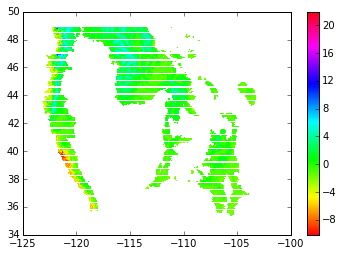

In [48]:
plt.scatter(data.frlon,data.frlat,s=0.5,marker='s',c=data['snowmelt']-data['prate'],cmap='hsv',edgecolor='none')
plt.colorbar()

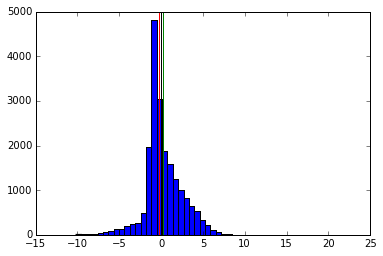

In [49]:
tmp = data['snowmelt']-data['prate']
plt.hist(tmp.as_matrix(),50);
plt.axvline(0,c='k')
plt.axvline(tmp.median(),c='r')
plt.axvline(tmp.mean(),c='g')

In [37]:
lats = np.unique(data.frlat)
lons = np.unique(data.frlon)

In [38]:
lats.sort()
lons.sort()
lats = lats[::-1]

In [39]:
def compute_x(frlon):
    indexer = np.abs(lons-frlon)
    return np.argmin(indexer)
    
def compute_y(frlat):
    indexer = np.abs(lats-frlat)
    return np.argmin(indexer)

In [40]:
data['x'] = data.frlon.map(compute_x)
data['y'] = data.frlat.map(compute_y)

In [41]:
data.prate.describe()

count    19983.000000
mean         4.187333
std          2.380910
min          1.087986
25%          2.588061
50%          3.423131
75%          4.887623
max         16.478917
Name: prate, dtype: float64

In [42]:
y = len(lats)
x = len(lons)

tmp = np.random.randn(x*y)
tmp.shape = [y,x]
tmp[:] = np.NAN

In [43]:
data['sm_rr']=data['snowmelt'] - data['rr']

In [44]:
def insert_value(df):
    x = df.x
    y = df.y
    val = df.sm_rr
    
    tmp[y,x] = val

In [45]:
data.apply(insert_value,axis=1);

In [46]:
import matplotlib as mpl

In [47]:
cmap = mpl.cm.get_cmap('seismic_r',11)

<matplotlib.colorbar.Colorbar instance at 0x10ae809e0>

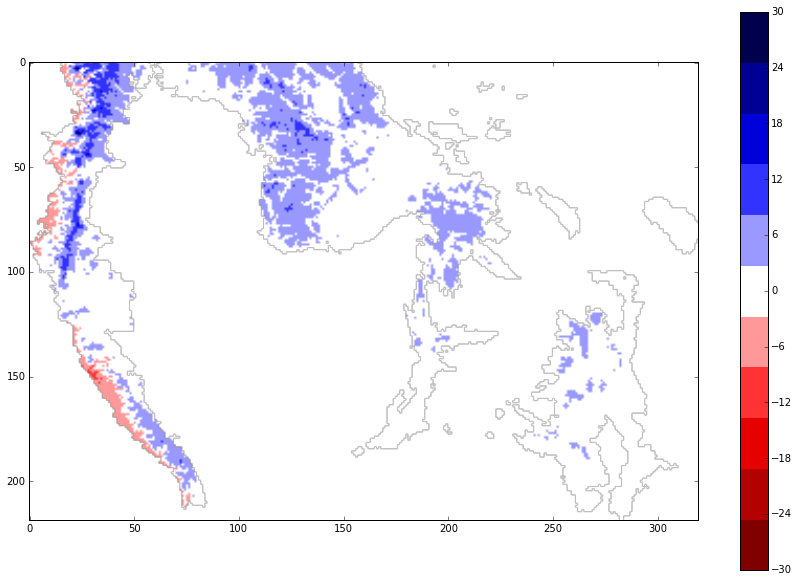

In [48]:
plt.figure(figsize=(15,10))
plt.imshow(tmp, cmap=cmap, vmin=-30, vmax=30)
plt.colorbar()

In [49]:
tmp2 = np.arange(0,20)
tmp2[:] = np.nan

In [50]:
tmp2

array([-9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808])

In [51]:
whos

Variable       Type                        Data/Info
----------------------------------------------------
DI             ndarray                     50001: 50001 elems, type `float64`, 400008 bytes (390 kb)
EI             ndarray                     50001: 50001 elems, type `float64`, 400008 bytes (390 kb)
SF             str                         Sf
Sfg            ndarray                     35001: 35001 elems, type `float64`, 280008 bytes (273 kb)
X              Series                      0        1.237106\n1     <...> snowmelt, dtype: float64
alpha          float                       0.5
ax             AxesSubplot                 Axes(0.125,0.125;0.412662x0.775)
ax1            AxesSubplot                 Axes(0.110202,0.125;0.387885x0.827778)
ax2            AxesSubplot                 Axes(0.585461,0.125;0.387885x0.827778)
ax3            AxesSubplot                 Axes(0.23418,0.302245;0.702832x0.188267)
ax4            AxesSubplot                 Axes(0.23418,0.0571605;0.702832x

In [56]:
print list(data.columns)

['frlon', 'PETpenmanvic', 'P', 'ET', 'frlat', 'Sf', 'meanablseason', 'meandosnowfree', 'meanpeakswe', 'meanpeaket', 'meandopeaket', 'lon_x', 'meanablslope', 'lat_x', 'meandopeakswe', 'infilt', 'fs_active', 'l1_quartz', 'l3_Wpwp_FRACT', 'l3_bulkD', 'l3_init_moist', 'annual_prec', 'l2_soil_density', 'l2_Ksat', 'rough', 'l2_Wcr_FRACT', 'l2_depth', 'l2_quartz', 'l1_phi_s', 'l3_bubble', 'l1_expt', 'Ws', 'l1_Ksat', 'l1_soil_density', 'l1_resid_moisture', 'l2_phi_s', 'l2_init_moist', 'l2_expt', 'l1_init_moist', 'l1_depth', 'off_gmt', 'l3_expt', 'l3_depth', 'Dsmax', 'l1_Wpwp_FRACT', 'l3_resid_moisture', 'avg_T', 'l3_soil_density', 'l3_phi_s', 'dp', 'c', 'l2_bulkD', 'l2_bubble', 'l2_Wpwp_FRACT', 'l3_Ksat', 'l3_quartz', 'Ds', 'l1_bulkD', 'l1_bubble', 'l2_resid_moisture', 'elev', 'snow_rough', 'l1_Wcr_FRACT', 'l3_Wcr_FRACT', 'slope', 'rsquared_adj', 'intercept', 'rsquared', 'pvalue', 'w_flux', 'w_flux2', 'w_flux3', 'snowmelt', 'Sf2', 'Sf1', 'Sf_2', 'Sf_1', 'wflux4', 'wflux5', 'rain', 'netSM', 'se

In [57]:
data['sm_PET'] = data.snowmelt/data.PETpenmanvic

(-0.2, 0.4)

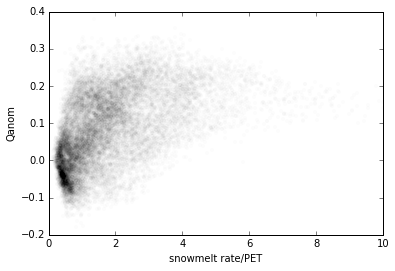

In [64]:
plt.scatter(data.sm_PET,data.Qanom_P,s=10,c='k',alpha=0.01)
plt.xlabel('snowmelt rate/PET')
plt.ylabel('Qanom')
plt.xlim(0,10)
plt.ylim(-0.2,0.4)

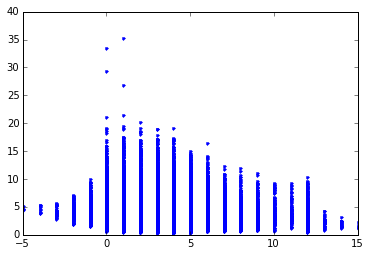

In [5]:
plt.plot(data.avg_T, data.snowmelt,'.')

(array([   13.,   213.,  3955.,  4326.,  4157.,  3632.,  1985.,   434.,
         1199.,    69.]),
 array([ -5.,  -3.,  -1.,   1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.]),
 <a list of 10 Patch objects>)

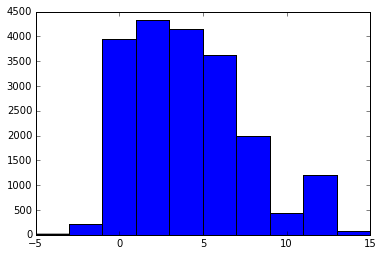

In [6]:
plt.hist(data.avg_T.as_matrix())

In [7]:
data.avg_T.head()

0    8
1    8
2    8
3    8
4    8
Name: avg_T, dtype: float64